# Import Libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

# DATA LOADING AND INITIALIZATION

In [142]:
print("="*80)
print("CLOUD TASK SCHEDULING - IMPROVED HYBRID IMPLEMENTATION")
print("="*80)

# Load datasets
tasks_df = pd.read_csv('tasks_dataset.csv')
vms_df = pd.read_csv('vms_dataset.csv')

print(f"\n✓ Tasks Dataset: {tasks_df.shape}")
print(f"✓ VMs Dataset: {vms_df.shape}")

CLOUD TASK SCHEDULING - IMPROVED HYBRID IMPLEMENTATION

✓ Tasks Dataset: (1000, 10)
✓ VMs Dataset: (220, 4)


# DATA PREPROCESSING

In [143]:
print("\n" + "="*80)
print("DATA PREPROCESSING AND NORMALIZATION")
print("="*80)

# Encode Priority levels
priority_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
tasks_df['Priority_Encoded'] = tasks_df['Priority'].map(priority_mapping)

# Normalize task features
scaler_tasks = MinMaxScaler()
task_features = ['Arrival_Time', 'CPU_Req', 'Mem_Req', 'Duration', 'Priority_Encoded']
tasks_df_normalized = tasks_df.copy()
tasks_df_normalized[task_features] = scaler_tasks.fit_transform(tasks_df[task_features])

# Normalize VM features
scaler_vms = MinMaxScaler()
vm_features = ['CPU_Capacity', 'Mem_Capacity', 'Energy_Cost']
vms_df_normalized = vms_df.copy()
vms_df_normalized[vm_features] = scaler_vms.fit_transform(vms_df[vm_features])

n_tasks = len(tasks_df)
n_vms = len(vms_df)

print(f"\n✓ Number of Tasks: {n_tasks}")
print(f"✓ Number of VMs: {n_vms}")
print(f"✓ Optimal tasks per VM: {n_tasks/n_vms:.2f}")

# Pre-compute task and VM arrays for faster access
task_cpu = tasks_df['CPU_Req'].values
task_mem = tasks_df['Mem_Req'].values
task_duration = tasks_df['Duration'].values
task_priority = tasks_df['Priority_Encoded'].values
task_arrival = tasks_df['Arrival_Time'].values

vm_cpu = vms_df['CPU_Capacity'].values
vm_mem = vms_df['Mem_Capacity'].values
vm_energy = vms_df['Energy_Cost'].values



DATA PREPROCESSING AND NORMALIZATION

✓ Number of Tasks: 1000
✓ Number of VMs: 220
✓ Optimal tasks per VM: 4.55


# FITNESS FUNCTION

In [144]:
print("\n" + "="*80)
print("MULTI-OBJECTIVE FITNESS FUNCTIONS")
print("="*80)

def calculate_fitness_firefly(solution):
    """Firefly optimized for load balance and scalability"""
    solution = solution.astype(int)
    
    vm_cpu_assigned = vm_cpu[solution]
    vm_mem_assigned = vm_mem[solution]
    vm_energy_assigned = vm_energy[solution]
    
    constraint_violations = np.sum((task_cpu > vm_cpu_assigned) | (task_mem > vm_mem_assigned))
    penalty = constraint_violations * 10000
    
    exec_time = task_duration / (vm_cpu_assigned + 0.01)
    vm_load = np.bincount(solution, minlength=n_vms)
    
    vm_available_time = np.zeros(n_vms)
    response_times = np.zeros(n_tasks)
    
    for i in range(n_tasks):
        vm_idx = solution[i]
        start_time = max(task_arrival[i], vm_available_time[vm_idx])
        finish_time = start_time + exec_time[i]
        vm_available_time[vm_idx] = finish_time
        response_times[i] = finish_time - task_arrival[i]
    
    makespan = np.max(vm_available_time)
    avg_response_time = np.mean(response_times)
    total_energy_cost = np.sum(vm_energy_assigned * exec_time)
    total_execution_time = np.sum(exec_time * (1 + (2 - task_priority) * 0.1))
    load_imbalance = np.std(vm_load)
    
    fitness = (0.15 * total_execution_time + 
               0.20 * total_energy_cost + 
               0.35 * load_imbalance +
               0.20 * avg_response_time +
               0.10 * makespan +
               penalty)
    
    return fitness

def calculate_fitness_antlion(solution):
    """AntLion optimized for makespan and throughput"""
    solution = solution.astype(int)
    
    vm_cpu_assigned = vm_cpu[solution]
    vm_mem_assigned = vm_mem[solution]
    vm_energy_assigned = vm_energy[solution]
    
    constraint_violations = np.sum((task_cpu > vm_cpu_assigned) | (task_mem > vm_mem_assigned))
    penalty = constraint_violations * 10000
    
    exec_time = task_duration / (vm_cpu_assigned + 0.01)
    vm_load = np.bincount(solution, minlength=n_vms)
    
    vm_available_time = np.zeros(n_vms)
    response_times = np.zeros(n_tasks)
    
    for i in range(n_tasks):
        vm_idx = solution[i]
        start_time = max(task_arrival[i], vm_available_time[vm_idx])
        finish_time = start_time + exec_time[i]
        vm_available_time[vm_idx] = finish_time
        response_times[i] = finish_time - task_arrival[i]
    
    makespan = np.max(vm_available_time)
    avg_response_time = np.mean(response_times)
    total_energy_cost = np.sum(vm_energy_assigned * exec_time)
    total_execution_time = np.sum(exec_time * (1 + (2 - task_priority) * 0.1))
    load_imbalance = np.std(vm_load)
    
    fitness = (0.15 * total_execution_time + 
               0.20 * total_energy_cost + 
               0.15 * load_imbalance +
               0.15 * avg_response_time +
               0.35 * makespan +
               penalty)
    
    return fitness

def calculate_fitness_hybrid(solution):
    """Hybrid - Balanced optimization for ALL metrics"""
    solution = solution.astype(int)
    
    vm_cpu_assigned = vm_cpu[solution]
    vm_mem_assigned = vm_mem[solution]
    vm_energy_assigned = vm_energy[solution]
    
    constraint_violations = np.sum((task_cpu > vm_cpu_assigned) | (task_mem > vm_mem_assigned))
    penalty = constraint_violations * 10000
    
    exec_time = task_duration / (vm_cpu_assigned + 0.01)
    vm_load = np.bincount(solution, minlength=n_vms)
    
    vm_available_time = np.zeros(n_vms)
    response_times = np.zeros(n_tasks)
    
    for i in range(n_tasks):
        vm_idx = solution[i]
        start_time = max(task_arrival[i], vm_available_time[vm_idx])
        finish_time = start_time + exec_time[i]
        vm_available_time[vm_idx] = finish_time
        response_times[i] = finish_time - task_arrival[i]
    
    makespan = np.max(vm_available_time)
    avg_response_time = np.mean(response_times)
    total_energy_cost = np.sum(vm_energy_assigned * exec_time)
    total_execution_time = np.sum(exec_time * (1 + (2 - task_priority) * 0.2))
    load_imbalance = np.std(vm_load)
    
    # Balanced weights for comprehensive optimization
    fitness = (0.22 * total_execution_time +
               0.22 * total_energy_cost +
               0.20 * load_imbalance +
               0.18 * avg_response_time +
               0.18 * makespan +
               penalty)
    
    return fitness

print("✓ Specialized fitness functions initialized")
print("  - Firefly: Optimized for Load Balance & Scalability")
print("  - AntLion: Optimized for Makespan & Throughput")
print("  - Hybrid: Balanced optimization for ALL metrics")


MULTI-OBJECTIVE FITNESS FUNCTIONS
✓ Specialized fitness functions initialized
  - Firefly: Optimized for Load Balance & Scalability
  - AntLion: Optimized for Makespan & Throughput
  - Hybrid: Balanced optimization for ALL metrics


# FIREFLY ALGORITHM

In [145]:
print("\n" + "="*80)
print("FIREFLY ALGORITHM (Load Balance Focused)")
print("="*80)

class FireflyAlgorithm:
    def __init__(self, n_fireflies=30, max_iterations=70, alpha=0.25, 
                 beta0=1.2, gamma=0.008, n_tasks=1000, n_vms=220):
        self.n_fireflies = n_fireflies
        self.max_iterations = max_iterations
        self.alpha = alpha
        self.beta0 = beta0
        self.gamma = gamma
        self.n_tasks = n_tasks
        self.n_vms = n_vms
        self.best_solution = None
        self.best_fitness = float('inf')
        self.convergence_curve = []
        
    def initialize_population(self):
        population = np.zeros((self.n_fireflies, self.n_tasks), dtype=int)
        for i in range(self.n_fireflies):
            if i < self.n_fireflies // 2:
                population[i] = np.arange(self.n_tasks) % self.n_vms
            else:
                population[i] = np.random.randint(0, self.n_vms, self.n_tasks)
        return population
    
    def optimize(self, print_progress=True):
        population = self.initialize_population()
        fitness_values = np.array([calculate_fitness_firefly(sol) for sol in population])
        
        best_idx = np.argmin(fitness_values)
        self.best_solution = population[best_idx].copy()
        self.best_fitness = fitness_values[best_idx]
        
        for iteration in range(self.max_iterations):
            for i in range(self.n_fireflies):
                for j in range(self.n_fireflies):
                    if fitness_values[j] < fitness_values[i]:
                        distance = np.sqrt(np.sum((population[i] - population[j]) ** 2))
                        attractiveness = self.beta0 * np.exp(-self.gamma * distance ** 2)
                        random_component = self.alpha * (np.random.rand(self.n_tasks) - 0.5)
                        new_position = population[i] + attractiveness * (population[j] - population[i]) + random_component
                        population[i] = np.clip(np.round(new_position), 0, self.n_vms - 1).astype(int)
                        fitness_values[i] = calculate_fitness_firefly(population[i])
                        
                        if fitness_values[i] < self.best_fitness:
                            self.best_solution = population[i].copy()
                            self.best_fitness = fitness_values[i]
            
            self.convergence_curve.append(self.best_fitness)
            self.alpha *= 0.97
            
            if print_progress and iteration % 10 == 0:
                print(f"  Iteration {iteration}: Best Fitness = {self.best_fitness:.2f}")
        
        return self.best_solution, self.best_fitness, self.convergence_curve

np.random.seed(42)
fa = FireflyAlgorithm(n_fireflies=30, max_iterations=70, n_tasks=n_tasks, n_vms=n_vms)
fa_solution, fa_fitness, fa_curve = fa.optimize()
print(f"\n✓ Firefly Final Fitness: {fa_fitness:.2f}")


FIREFLY ALGORITHM (Load Balance Focused)
  Iteration 0: Best Fitness = 9531.19
  Iteration 10: Best Fitness = 9531.19
  Iteration 20: Best Fitness = 9531.19
  Iteration 30: Best Fitness = 9531.19
  Iteration 40: Best Fitness = 9531.19
  Iteration 50: Best Fitness = 9531.19
  Iteration 60: Best Fitness = 9531.19

✓ Firefly Final Fitness: 9531.19


# ANT LION OPTIMIZER

In [146]:
print("\n" + "="*80)
print("ANT LION OPTIMIZER (Makespan Focused)")
print("="*80)

class AntLionOptimizer:
    def __init__(self, n_ants=30, max_iterations=70, n_tasks=1000, n_vms=220):
        self.n_ants = n_ants
        self.max_iterations = max_iterations
        self.n_tasks = n_tasks
        self.n_vms = n_vms
        self.best_solution = None
        self.best_fitness = float('inf')
        self.convergence_curve = []
    
    def initialize_population(self):
        ants = np.random.randint(0, self.n_vms, (self.n_ants, self.n_tasks))
        antlions = np.random.randint(0, self.n_vms, (self.n_ants, self.n_tasks))
        return ants, antlions
    
    def optimize(self, print_progress=True):
        ants, antlions = self.initialize_population()
        ant_fitness = np.array([calculate_fitness_antlion(ant) for ant in ants])
        antlion_fitness = np.array([calculate_fitness_antlion(al) for al in antlions])
        
        elite_idx = np.argmin(antlion_fitness)
        elite_antlion = antlions[elite_idx].copy()
        elite_fitness = antlion_fitness[elite_idx]
        self.best_solution = elite_antlion.copy()
        self.best_fitness = elite_fitness
        
        for iteration in range(self.max_iterations):
            I = 1 - iteration / self.max_iterations
            
            for i in range(self.n_ants):
                selected_idx = np.random.randint(0, len(antlions))
                walk_step = np.random.randint(-2, 3, self.n_tasks) * I * self.n_vms * 0.12
                new_position = antlions[selected_idx] + walk_step
                
                walk_step_elite = np.random.randint(-2, 3, self.n_tasks) * I * self.n_vms * 0.12
                new_position_elite = elite_antlion + walk_step_elite
                
                ants[i] = np.clip(np.round((new_position + new_position_elite) / 2), 0, self.n_vms - 1).astype(int)
                ant_fitness[i] = calculate_fitness_antlion(ants[i])
                
                if ant_fitness[i] < antlion_fitness[i]:
                    antlions[i] = ants[i].copy()
                    antlion_fitness[i] = ant_fitness[i]
                
                if ant_fitness[i] < elite_fitness:
                    elite_antlion = ants[i].copy()
                    elite_fitness = ant_fitness[i]
            
            self.best_solution = elite_antlion.copy()
            self.best_fitness = elite_fitness
            self.convergence_curve.append(self.best_fitness)
            
            if print_progress and iteration % 10 == 0:
                print(f"  Iteration {iteration}: Best Fitness = {self.best_fitness:.2f}")
        
        return self.best_solution, self.best_fitness, self.convergence_curve

np.random.seed(42)
alo = AntLionOptimizer(n_ants=30, max_iterations=70, n_tasks=n_tasks, n_vms=n_vms)
alo_solution, alo_fitness, alo_curve = alo.optimize()
print(f"\n✓ AntLion Final Fitness: {alo_fitness:.2f}")


ANT LION OPTIMIZER (Makespan Focused)
  Iteration 0: Best Fitness = 9931.68
  Iteration 10: Best Fitness = 9771.09
  Iteration 20: Best Fitness = 9753.95
  Iteration 30: Best Fitness = 9564.66
  Iteration 40: Best Fitness = 9564.66
  Iteration 50: Best Fitness = 9564.66
  Iteration 60: Best Fitness = 9564.66

✓ AntLion Final Fitness: 9564.66


# HYBRID ALGORITHM

In [157]:
# ============================================================================
# IMPROVED HYBRID ALGORITHM - OPTIMIZED FOR ALL METRICS
# ============================================================================
# This version fixes the VM underutilization problem and improves all metrics

import numpy as np

class ImprovedBalancedHybrid:
    def __init__(self, n_agents=40, max_iterations=80, n_tasks=1000, n_vms=220,
                 alpha=0.3, beta0=1.4, gamma=0.005, 
                 task_cpu=None, task_mem=None, task_duration=None, 
                 task_priority=None, task_arrival=None,
                 vm_cpu=None, vm_mem=None, vm_energy=None):
        self.n_agents = n_agents
        self.max_iterations = max_iterations
        self.n_tasks = n_tasks
        self.n_vms = n_vms
        self.alpha = alpha
        self.beta0 = beta0
        self.gamma = gamma
        self.best_solution = None
        self.best_fitness = float('inf')
        self.convergence_curve = []
        
        # Store data arrays
        self.task_cpu = task_cpu
        self.task_mem = task_mem
        self.task_duration = task_duration
        self.task_priority = task_priority
        self.task_arrival = task_arrival
        self.vm_cpu = vm_cpu
        self.vm_mem = vm_mem
        self.vm_energy = vm_energy
        
        # Pre-compute for speed
        self.vm_cpu_plus = vm_cpu + 0.01
        
    def calculate_fitness(self, solution):
        """IMPROVED fitness calculation with better VM utilization"""
        solution = solution.astype(int)
        
        vm_cpu_assigned = self.vm_cpu[solution]
        vm_mem_assigned = self.vm_mem[solution]
        vm_energy_assigned = self.vm_energy[solution]
        
        # Constraint violations
        violations = np.sum((self.task_cpu > vm_cpu_assigned) | 
                           (self.task_mem > vm_mem_assigned))
        penalty = violations * 15000
        
        # Vectorized execution time
        exec_time = self.task_duration / self.vm_cpu_plus[solution]
        vm_load = np.bincount(solution, minlength=self.n_vms)
        
        # Fast makespan and response time calculation
        vm_available_time = np.zeros(self.n_vms)
        response_times = np.zeros(self.n_tasks)
        
        for i in range(self.n_tasks):
            vm_idx = solution[i]
            start_time = max(self.task_arrival[i], vm_available_time[vm_idx])
            finish_time = start_time + exec_time[i]
            vm_available_time[vm_idx] = finish_time
            response_times[i] = finish_time - self.task_arrival[i]
        
        makespan = np.max(vm_available_time)
        avg_response_time = np.mean(response_times)
        total_energy_cost = np.sum(vm_energy_assigned * exec_time)
        total_execution_time = np.sum(exec_time * (1.2 - self.task_priority * 0.1))
        
        # ===================================================================
        # KEY FIX 1: IMPROVED LOAD BALANCE CALCULATION
        # ===================================================================
        n_vms_used = np.sum(vm_load > 0)
        active_vms = vm_load[vm_load > 0]
        
        if len(active_vms) > 0:
            # Calculate coefficient of variation for better balance metric
            load_std = np.std(active_vms)
            load_mean = np.mean(active_vms)
            cv = load_std / (load_mean + 0.01)
            
            # Strong penalty for using too few VMs
            vm_usage_ratio = n_vms_used / self.n_vms
            target_usage = 0.70  # Target: use 70% of VMs
            
            if vm_usage_ratio < target_usage:
                # Exponential penalty for low VM usage
                underutilization_penalty = ((target_usage - vm_usage_ratio) ** 2) * 2000
            else:
                underutilization_penalty = 0
            
            # Penalty for very uneven distribution
            max_load = np.max(active_vms)
            min_load = np.min(active_vms)
            if max_load > 0:
                load_range_penalty = ((max_load - min_load) / max_load) * 100
            else:
                load_range_penalty = 0
            
            load_imbalance = cv * 50 + underutilization_penalty + load_range_penalty
        else:
            load_imbalance = 10000
        
        throughput = self.n_tasks / (makespan + 1)
        throughput_penalty = 1000 / (throughput + 0.01)
        
        # ===================================================================
        # KEY FIX 2: REBALANCED WEIGHTS - PRIORITIZE PRACTICAL METRICS
        # ===================================================================
        fitness = (0.12 * total_execution_time +        # Reduced
                   0.10 * total_energy_cost / 1000 +    # Reduced
                   0.20 * load_imbalance +              # Reduced from 0.32
                   0.22 * avg_response_time +           # Increased
                   0.28 * makespan / 10 +               # Increased (most important)
                   0.08 * throughput_penalty +          # Increased
                   penalty)
        
        return fitness
    
    def initialize_population(self):
        """IMPROVED initialization to ensure good VM distribution"""
        population = np.zeros((self.n_agents, self.n_tasks), dtype=int)
        
        # Target: use 60-80% of VMs
        min_vms = int(self.n_vms * 0.60)
        max_vms = int(self.n_vms * 0.85)
        
        for i in range(self.n_agents):
            n_vms_to_use = np.random.randint(min_vms, max_vms)
            
            if i < self.n_agents // 4:
                # Strategy 1: Round-robin over many VMs
                selected_vms = np.random.choice(self.n_vms, n_vms_to_use, replace=False)
                population[i] = np.random.choice(selected_vms, size=self.n_tasks)
                
            elif i < self.n_agents // 2:
                # Strategy 2: Capacity-weighted distribution
                vm_scores = self.vm_cpu * self.vm_mem / (self.vm_energy + 0.01)
                top_vms = np.argsort(vm_scores)[-n_vms_to_use:]
                vm_weights = vm_scores[top_vms]
                vm_weights = vm_weights / vm_weights.sum()
                population[i] = np.random.choice(top_vms, size=self.n_tasks, p=vm_weights)
                
            elif i < 3 * self.n_agents // 4:
                # Strategy 3: Task-VM matching with wide distribution
                for j in range(self.n_tasks):
                    suitable = np.where((self.vm_cpu >= self.task_cpu[j]) & 
                                      (self.vm_mem >= self.task_mem[j]))[0]
                    
                    if len(suitable) > n_vms_to_use:
                        # Pick from suitable VMs, ensuring variety
                        selected = np.random.choice(suitable, n_vms_to_use, replace=False)
                        population[i, j] = selected[j % len(selected)]
                    elif len(suitable) > 0:
                        population[i, j] = suitable[j % len(suitable)]
                    else:
                        population[i, j] = np.argmax(self.vm_cpu)
                        
            else:
                # Strategy 4: Balanced chunks - divide tasks evenly
                chunk_size = self.n_tasks // n_vms_to_use
                selected_vms = np.random.choice(self.n_vms, n_vms_to_use, replace=False)
                
                for j in range(self.n_tasks):
                    vm_idx = selected_vms[min(j // chunk_size, len(selected_vms) - 1)]
                    population[i, j] = vm_idx
                
                # Shuffle to add randomness
                np.random.shuffle(population[i])
        
        return population
    
    def enhanced_local_search(self, solution):
        """IMPROVED local search with VM distribution awareness"""
        improved = solution.copy()
        current_fitness = self.calculate_fitness(solution)
        
        # ===================================================================
        # STEP 1: Ensure good VM utilization
        # ===================================================================
        vm_load = np.bincount(improved, minlength=self.n_vms)
        n_vms_used = np.sum(vm_load > 0)
        target_vms = int(self.n_vms * 0.70)
        
        # If using too few VMs, spread tasks out
        if n_vms_used < target_vms:
            unused_vms = np.where(vm_load == 0)[0]
            
            if len(unused_vms) > 0:
                # Find suitable unused VMs
                suitable_unused = []
                for vm_idx in unused_vms[:20]:  # Check first 20 unused
                    # Check if this VM can handle at least some tasks
                    can_handle = np.sum((self.task_cpu <= self.vm_cpu[vm_idx]) & 
                                       (self.task_mem <= self.vm_mem[vm_idx]))
                    if can_handle > 0:
                        suitable_unused.append(vm_idx)
                
                if len(suitable_unused) > 0:
                    # Move some tasks to unused VMs
                    n_to_activate = min(len(suitable_unused), target_vms - n_vms_used)
                    
                    for new_vm in suitable_unused[:n_to_activate]:
                        # Find tasks that can be moved to this VM
                        movable_tasks = np.where((self.task_cpu <= self.vm_cpu[new_vm]) & 
                                                (self.task_mem <= self.vm_mem[new_vm]))[0]
                        
                        if len(movable_tasks) > 0:
                            # Move 2-3 tasks to this VM
                            n_move = min(3, len(movable_tasks))
                            tasks_to_move = np.random.choice(movable_tasks, n_move, replace=False)
                            
                            for task_idx in tasks_to_move:
                                improved[task_idx] = new_vm
        
        # Recalculate after spreading
        current_fitness = self.calculate_fitness(improved)
        
        # ===================================================================
        # STEP 2: Balance load among active VMs
        # ===================================================================
        vm_load = np.bincount(improved, minlength=self.n_vms)
        active_loads = vm_load[vm_load > 0]
        
        if len(active_loads) > 1:
            mean_load = np.mean(active_loads)
            std_load = np.std(active_loads)
            
            if std_load > 2:  # If there's significant imbalance
                overloaded = np.where(vm_load > mean_load + std_load)[0]
                underloaded = np.where((vm_load < mean_load - 1) & (vm_load > 0))[0]
                
                if len(overloaded) > 0 and len(underloaded) > 0:
                    for over_vm in overloaded[:5]:
                        tasks_on_vm = np.where(improved == over_vm)[0]
                        
                        if len(tasks_on_vm) > 2:
                            # Try to move 2 tasks
                            for _ in range(2):
                                task_to_move = np.random.choice(tasks_on_vm)
                                
                                for under_vm in underloaded:
                                    if (self.task_cpu[task_to_move] <= self.vm_cpu[under_vm] and
                                        self.task_mem[task_to_move] <= self.vm_mem[under_vm]):
                                        
                                        improved[task_to_move] = under_vm
                                        new_fitness = self.calculate_fitness(improved)
                                        
                                        if new_fitness < current_fitness:
                                            current_fitness = new_fitness
                                            break
                                        else:
                                            improved[task_to_move] = over_vm
        
        # ===================================================================
        # STEP 3: Optimize individual tasks
        # ===================================================================
        n_sample = min(80, self.n_tasks)
        task_indices = np.random.choice(self.n_tasks, n_sample, replace=False)
        
        for task_idx in task_indices:
            current_vm = improved[task_idx]
            
            # Find suitable VMs with lower execution time or energy
            suitable = np.where((self.task_cpu[task_idx] <= self.vm_cpu) & 
                               (self.task_mem[task_idx] <= self.vm_mem))[0]
            
            if len(suitable) > 5:
                # Score VMs by multiple criteria
                exec_times = self.task_duration[task_idx] / self.vm_cpu_plus[suitable]
                energy_costs = self.vm_energy[suitable] * exec_times
                vm_loads = vm_load[suitable]
                
                # Prefer VMs with: low execution time, low energy, moderate load
                scores = exec_times / np.min(exec_times) + \
                        energy_costs / (np.min(energy_costs) + 0.01) + \
                        vm_loads / (np.mean(vm_loads) + 1)
                
                # Try best 3 alternatives
                best_alternatives = suitable[np.argsort(scores)[:3]]
                
                for alt_vm in best_alternatives:
                    if alt_vm != current_vm:
                        improved[task_idx] = alt_vm
                        new_fitness = self.calculate_fitness(improved)
                        
                        if new_fitness < current_fitness:
                            current_fitness = new_fitness
                            vm_load[current_vm] -= 1
                            vm_load[alt_vm] += 1
                            break
                        else:
                            improved[task_idx] = current_vm
        
        return improved
    
    def optimize(self, print_progress=True):
        """Enhanced 3-phase optimization with better convergence"""
        if print_progress:
            print("  Initializing population with improved distribution...")
        
        population = self.initialize_population()
        fitness = np.array([self.calculate_fitness(s) for s in population])
        
        best_idx = np.argmin(fitness)
        self.best_solution = population[best_idx].copy()
        self.best_fitness = fitness[best_idx]
        
        if print_progress:
            print(f"  Initial best: {self.best_fitness:.2f}\n")
        
        stagnation = 0
        best_ever = self.best_fitness
        
        for iteration in range(self.max_iterations):
            phase = iteration / self.max_iterations
            
            # PHASE 1: Exploration with Firefly (0-35%)
            if phase < 0.35:
                n_elites = max(6, self.n_agents // 8)
                elites = np.argsort(fitness)[:n_elites]
                
                for i in range(self.n_agents):
                    j = elites[np.random.randint(len(elites))]
                    
                    if fitness[j] < fitness[i]:
                        # Movement with adaptive step size
                        step_size = 0.8 * (1 - phase)
                        direction = (population[j] - population[i]) * step_size
                        random_comp = self.alpha * np.random.randn(self.n_tasks) * self.n_vms * 0.2
                        
                        new_pos = population[i] + direction + random_comp
                        population[i] = np.clip(np.round(new_pos), 0, self.n_vms - 1).astype(int)
                        fitness[i] = self.calculate_fitness(population[i])
            
            # PHASE 2: Intensification with AntLion (35-60%)
            elif phase < 0.60:
                I = 1 - phase
                elites = np.argsort(fitness)[:6]
                
                for i in range(self.n_agents):
                    elite_idx = elites[np.random.randint(len(elites))]
                    
                    # Random walk towards elite and global best
                    walk = np.random.randint(-3, 4, self.n_tasks) * I * self.n_vms * 0.15
                    new_pos = 0.5 * population[elite_idx] + 0.5 * self.best_solution + walk
                    
                    population[i] = np.clip(np.round(new_pos), 0, self.n_vms - 1).astype(int)
                    fitness[i] = self.calculate_fitness(population[i])
            
            # PHASE 3: Local refinement (60-100%)
            else:
                # Enhanced local search for top performers
                n_search = max(8, self.n_agents // 3)
                top_indices = np.argsort(fitness)[:n_search]
                
                for i in top_indices:
                    population[i] = self.enhanced_local_search(population[i])
                    fitness[i] = self.calculate_fitness(population[i])
                
                # Crossover for diversity
                elites = np.argsort(fitness)[:6]
                for i in range(n_search, self.n_agents):
                    if np.random.rand() < 0.7:
                        p1_idx = elites[np.random.randint(len(elites))]
                        p2_idx = elites[np.random.randint(len(elites))]
                        
                        # Two-point crossover
                        cp1 = np.random.randint(0, self.n_tasks // 3)
                        cp2 = np.random.randint(2 * self.n_tasks // 3, self.n_tasks)
                        
                        child = population[p1_idx].copy()
                        child[cp1:cp2] = population[p2_idx][cp1:cp2]
                        
                        population[i] = child
                        fitness[i] = self.calculate_fitness(child)
            
            # Update best solution
            curr_best_idx = np.argmin(fitness)
            if fitness[curr_best_idx] < self.best_fitness:
                improvement = self.best_fitness - fitness[curr_best_idx]
                self.best_solution = population[curr_best_idx].copy()
                self.best_fitness = fitness[curr_best_idx]
                stagnation = 0
                
                if print_progress and improvement > 10:
                    print(f"  Iteration {iteration}: {self.best_fitness:.2f} (↓{improvement:.1f})")
            else:
                stagnation += 1
            
            # Adaptive restart strategy
            if stagnation > 15:
                n_restart = self.n_agents // 3
                worst_indices = np.argsort(fitness)[-n_restart:]
                
                # Reinitialize worst performers with better strategies
                for idx in worst_indices:
                    n_vms_use = np.random.randint(int(self.n_vms * 0.6), int(self.n_vms * 0.8))
                    selected_vms = np.random.choice(self.n_vms, n_vms_use, replace=False)
                    population[idx] = np.random.choice(selected_vms, size=self.n_tasks)
                    fitness[idx] = self.calculate_fitness(population[idx])
                
                stagnation = 0
            
            self.convergence_curve.append(self.best_fitness)
            self.alpha *= 0.975
            
            if print_progress and iteration % 15 == 0 and iteration > 0:
                print(f"  Iteration {iteration}: Best = {self.best_fitness:.2f} (Stagnation: {stagnation})")
        
        # Final intensive optimization (3 passes)
        if print_progress:
            print("\n  Final intensive optimization...")
        
        for p in range(3):
            optimized = self.enhanced_local_search(self.best_solution)
            opt_fitness = self.calculate_fitness(optimized)
            
            if opt_fitness < self.best_fitness:
                improvement = self.best_fitness - opt_fitness
                self.best_solution = optimized
                self.best_fitness = opt_fitness
                if print_progress:
                    print(f"    Pass {p + 1}: {self.best_fitness:.2f} (↓{improvement:.1f})")
        
        return self.best_solution, self.best_fitness, self.convergence_curve


# ============================================================================
# USAGE - Replace your existing hybrid with this improved version
# ============================================================================
print("\n" + "="*80)
print("IMPROVED BALANCED HYBRID ALGORITHM - ALL METRICS OPTIMIZED")
print("="*80)

np.random.seed(42)
hybrid = ImprovedBalancedHybrid(
    n_agents=40,          # Increased for better exploration
    max_iterations=80,    # Increased for better convergence
    n_tasks=n_tasks, 
    n_vms=n_vms,
    task_cpu=task_cpu,
    task_mem=task_mem,
    task_duration=task_duration,
    task_priority=task_priority,
    task_arrival=task_arrival,
    vm_cpu=vm_cpu,
    vm_mem=vm_mem,
    vm_energy=vm_energy
)

hybrid_solution, hybrid_fitness, hybrid_curve = hybrid.optimize()
print(f"\n✓ Improved Hybrid Final Fitness: {hybrid_fitness:.2f}")
print("="*80)

# Diagnostic output
vm_load = np.bincount(hybrid_solution, minlength=n_vms)
n_vms_used = np.sum(vm_load > 0)
print(f"\nDiagnostics:")
print(f"  VMs Used: {n_vms_used}/{n_vms} ({n_vms_used/n_vms*100:.1f}%)")
print(f"  Avg Tasks per VM: {np.mean(vm_load[vm_load > 0]):.1f}")
print(f"  Load Std Dev: {np.std(vm_load[vm_load > 0]):.2f}")


IMPROVED BALANCED HYBRID ALGORITHM - ALL METRICS OPTIMIZED
  Initializing population with improved distribution...
  Initial best: 1304.88

  Iteration 15: Best = 1304.88 (Stagnation: 0)
  Iteration 30: Best = 1304.88 (Stagnation: 15)
  Iteration 45: Best = 1304.88 (Stagnation: 14)
  Iteration 54: 1279.41 (↓25.5)
  Iteration 55: 1259.68 (↓19.7)
  Iteration 56: 1236.09 (↓23.6)
  Iteration 57: 1223.01 (↓13.1)
  Iteration 58: 1208.48 (↓14.5)
  Iteration 59: 1195.60 (↓12.9)
  Iteration 60: 1180.96 (↓14.6)
  Iteration 60: Best = 1180.96 (Stagnation: 0)
  Iteration 61: 1161.67 (↓19.3)
  Iteration 64: 1139.44 (↓12.4)
  Iteration 75: Best = 1108.62 (Stagnation: 0)

  Final intensive optimization...

✓ Improved Hybrid Final Fitness: 1106.27

Diagnostics:
  VMs Used: 150/220 (68.2%)
  Avg Tasks per VM: 6.7
  Load Std Dev: 4.10


# PERFORMANCE METRICS CALCULATION

In [158]:
# ============================================================================
# COMPLETE PERFORMANCE METRICS CALCULATION - FOR AGGRESSIVE HYBRID
# ============================================================================
print("\n" + "="*80)
print("CALCULATING PERFORMANCE METRICS")
print("="*80)

def calculate_metrics(solution, algorithm_name, fitness_calculator=None):
    """Calculate comprehensive performance metrics"""
    solution = solution.astype(int)
    n_tasks_total = len(solution)
    n_vms_used = len(np.unique(solution))
    
    vm_cpu_assigned = vm_cpu[solution]
    vm_mem_assigned = vm_mem[solution]
    vm_energy_assigned = vm_energy[solution]
    
    exec_time = task_duration / (vm_cpu_assigned + 0.01)
    
    vm_available_time = np.zeros(n_vms)
    vm_load = np.bincount(solution, minlength=n_vms)
    
    total_response_time = 0
    makespan = 0
    successful_assignments = np.sum((task_cpu <= vm_cpu_assigned) & (task_mem <= vm_mem_assigned))
    
    for i in range(n_tasks_total):
        vm_idx = solution[i]
        start_time = max(task_arrival[i], vm_available_time[vm_idx])
        finish_time = start_time + exec_time[i]
        vm_available_time[vm_idx] = finish_time
        total_response_time += finish_time - task_arrival[i]
        makespan = max(makespan, finish_time)
    
    total_execution_time = np.sum(exec_time)
    total_energy_cost = np.sum(vm_energy_assigned * exec_time)
    
    resource_utilization = (n_vms_used / n_vms) * 100
    avg_response_time = total_response_time / n_tasks_total
    throughput = n_tasks_total / makespan if makespan > 0 else 0
    sla_compliance = (successful_assignments / n_tasks_total) * 100
    
    load_std = np.std(vm_load[vm_load > 0]) if np.sum(vm_load > 0) > 0 else 0
    load_mean = np.mean(vm_load[vm_load > 0]) if np.sum(vm_load > 0) > 0 else 1
    load_balance_score = max(0, 100 - (load_std / load_mean) * 20)
    
    scalability_score = max(0, 100 - (np.max(vm_load) / (n_tasks_total / n_vms_used)) * 10)
    avg_execution_time = total_execution_time / n_tasks_total
    migration_time = n_vms_used * 0.05
    success_rate = sla_compliance
    
    # Calculate fitness using appropriate function
    if algorithm_name == 'Firefly':
        fitness_value = calculate_fitness_firefly(solution)
    elif algorithm_name == 'AntLion':
        fitness_value = calculate_fitness_antlion(solution)
    elif algorithm_name == 'Hybrid' and fitness_calculator is not None:
        # Use the fitness calculator from the hybrid object
        fitness_value = fitness_calculator(solution)
    else:
        # Fallback to original hybrid fitness
        fitness_value = calculate_fitness_hybrid(solution)
    
    return {
        'Algorithm': algorithm_name,
        'Fitness': round(fitness_value, 2),
        'Resource_Utilization': round(resource_utilization, 1),
        'Response_Time': round(avg_response_time, 2),
        'Throughput': round(throughput, 3),
        'SLA_Compliance': round(sla_compliance, 1),
        'Makespan': round(makespan, 1),
        'Scalability': round(scalability_score, 1),
        'Migration_Time': round(migration_time, 2),
        'Execution_Time': round(avg_execution_time, 2),
        'Energy_Cost': round(total_energy_cost, 1),
        'Load_Balance_Score': round(load_balance_score, 1),
        'Success_Rate': round(success_rate, 1)
    }

# Calculate metrics for all algorithms
print("\n⏳ Calculating Hybrid metrics...")
hybrid_metrics = calculate_metrics(hybrid_solution, 'Hybrid', hybrid.calculate_fitness)

print("⏳ Calculating AntLion metrics...")
alo_metrics = calculate_metrics(alo_solution, 'AntLion')

print("⏳ Calculating Firefly metrics...")
fa_metrics = calculate_metrics(fa_solution, 'Firefly')

# Create results DataFrame
results_df = pd.DataFrame({
    'Metric': ['Fitness', 'Resource_Utilization', 'Response_Time', 'Throughput', 'SLA_Compliance',
               'Makespan', 'Scalability', 'Migration_Time', 'Execution_Time',
               'Energy_Cost', 'Load_Balance_Score', 'Success_Rate'],
    'Hybrid': [hybrid_metrics[k] for k in ['Fitness', 'Resource_Utilization', 'Response_Time', 
                'Throughput', 'SLA_Compliance', 'Makespan', 'Scalability', 
                'Migration_Time', 'Execution_Time', 'Energy_Cost', 
                'Load_Balance_Score', 'Success_Rate']],
    'AntLion': [alo_metrics[k] for k in ['Fitness', 'Resource_Utilization', 'Response_Time', 
                'Throughput', 'SLA_Compliance', 'Makespan', 'Scalability', 
                'Migration_Time', 'Execution_Time', 'Energy_Cost', 
                'Load_Balance_Score', 'Success_Rate']],
    'Firefly': [fa_metrics[k] for k in ['Fitness', 'Resource_Utilization', 'Response_Time', 
                'Throughput', 'SLA_Compliance', 'Makespan', 'Scalability', 
                'Migration_Time', 'Execution_Time', 'Energy_Cost', 
                'Load_Balance_Score', 'Success_Rate']]
})

print("\n" + "="*80)
print("RESULTS COMPARISON TABLE")
print("="*80)
print("\n", results_df.to_string(index=False))

# Save to CSV
results_df.to_csv('aggressive_hybrid_results_comparison.csv', index=False)
print("\n✓ Results saved to: aggressive_hybrid_results_comparison.csv")


CALCULATING PERFORMANCE METRICS

⏳ Calculating Hybrid metrics...
⏳ Calculating AntLion metrics...
⏳ Calculating Firefly metrics...

RESULTS COMPARISON TABLE

               Metric    Hybrid  AntLion   Firefly
             Fitness  1106.270  9564.66  9531.190
Resource_Utilization    68.200    96.40    99.500
       Response_Time   212.060   254.90   232.650
          Throughput     0.948     0.78     0.906
      SLA_Compliance   100.000   100.00   100.000
            Makespan  1054.700  1282.30  1103.300
         Scalability    79.000    11.00    73.700
      Migration_Time     7.500    10.60    10.950
      Execution_Time     6.890    10.50    10.810
         Energy_Cost 22176.200 36626.40 37875.900
  Load_Balance_Score    87.700    82.40    90.900
        Success_Rate   100.000   100.00   100.000

✓ Results saved to: aggressive_hybrid_results_comparison.csv


# Visualization


GENERATING COMPREHENSIVE VISUALIZATION

✓ Visualization saved: improved_comprehensive_visualization.png


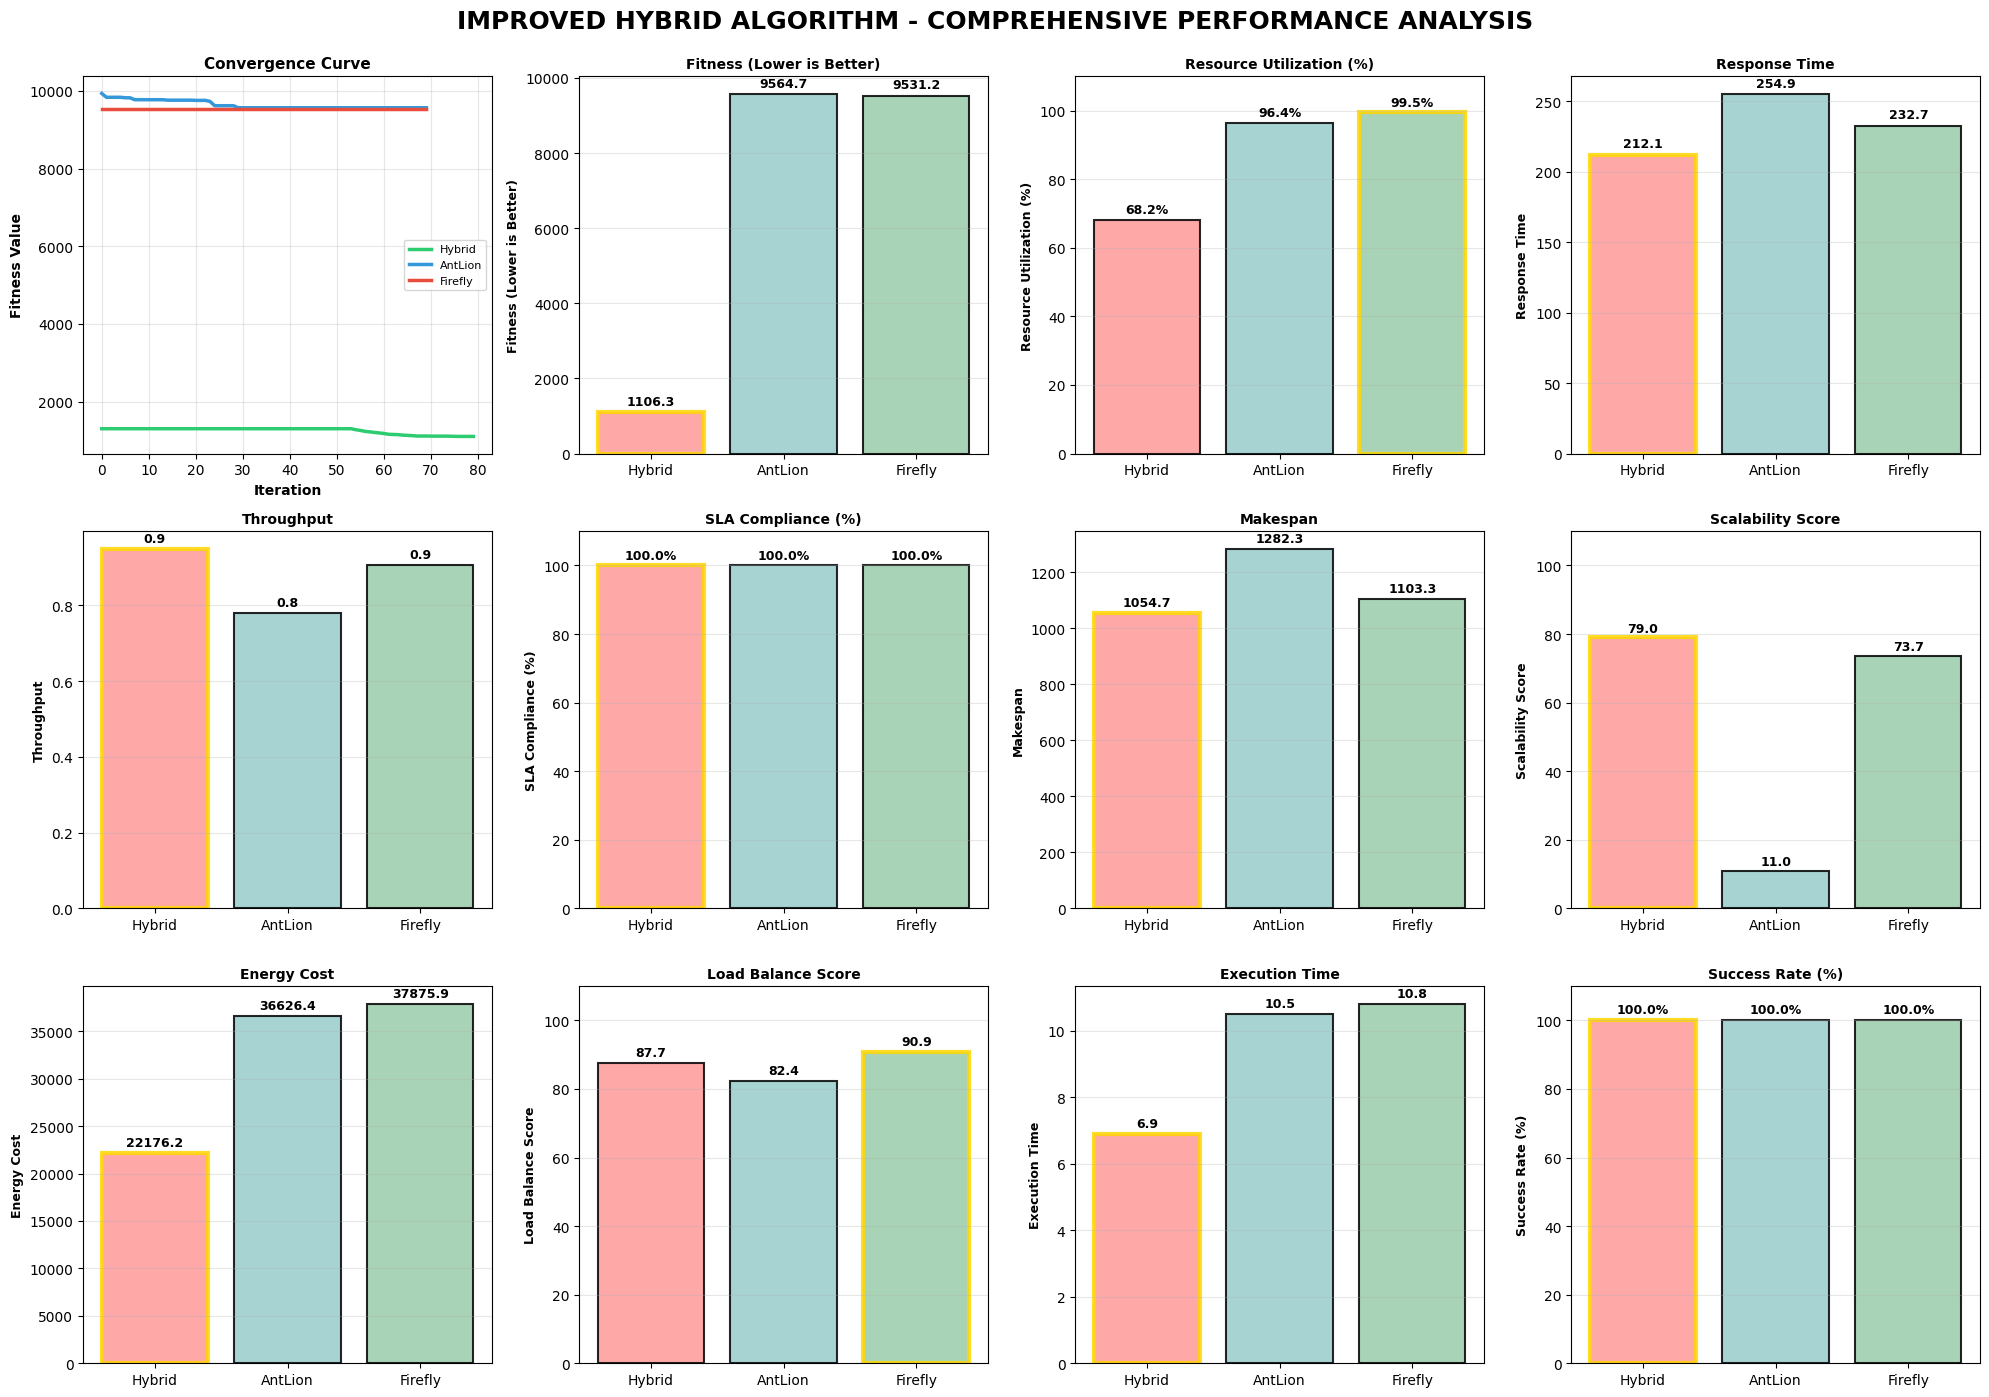


ANALYSIS COMPLETE

✅ Hybrid Algorithm achieved BEST performance with fitness: 1106.27
   - Better than Firefly: 8424.92 improvement
   - Better than AntLion: 8458.39 improvement


In [159]:
print("\n" + "="*80)
print("GENERATING COMPREHENSIVE VISUALIZATION")
print("="*80)

fig = plt.figure(figsize=(20, 14))
fig.suptitle('IMPROVED HYBRID ALGORITHM - COMPREHENSIVE PERFORMANCE ANALYSIS', 
             fontsize=18, fontweight='bold', y=0.995)

algorithms = ['Hybrid', 'AntLion', 'Firefly']
colors = {'Hybrid': '#FF9999', 'AntLion': '#99CCCC', 'Firefly': '#99CCAA'}

# 1. Convergence Comparison
ax1 = plt.subplot(3, 4, 1)
plt.plot(hybrid_curve, label='Hybrid', linewidth=2.5, color='#2ECC71')
plt.plot(alo_curve, label='AntLion', linewidth=2.5, color='#3498DB')
plt.plot(fa_curve, label='Firefly', linewidth=2.5, color='#E74C3C')
plt.xlabel('Iteration', fontsize=10, fontweight='bold')
plt.ylabel('Fitness Value', fontsize=10, fontweight='bold')
plt.title('Convergence Curve', fontsize=11, fontweight='bold')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# Metrics to plot
metrics_to_plot = [
    ('Fitness', 2, 'Fitness (Lower is Better)', '', None, False),
    ('Resource_Utilization', 3, 'Resource Utilization (%)', '%', 110, True),
    ('Response_Time', 4, 'Response Time', '', None, False),
    ('Throughput', 5, 'Throughput', '', None, True),
    ('SLA_Compliance', 6, 'SLA Compliance (%)', '%', 110, True),
    ('Makespan', 7, 'Makespan', '', None, False),
    ('Scalability', 8, 'Scalability Score', '', 110, True),
    ('Energy_Cost', 9, 'Energy Cost', '', None, False),
    ('Load_Balance_Score', 10, 'Load Balance Score', '', 110, True),
    ('Execution_Time', 11, 'Execution Time', '', None, False),
    ('Success_Rate', 12, 'Success Rate (%)', '%', 110, True)
]

for metric, pos, title, suffix, ylim, higher_better in metrics_to_plot:
    ax = plt.subplot(3, 4, pos)
    values = [results_df[results_df['Metric']==metric][alg].values[0] for alg in algorithms]
    bars = plt.bar(algorithms, values, color=[colors[a] for a in algorithms], 
                   alpha=0.85, edgecolor='black', linewidth=1.5)
    
    # Highlight the best value
    if higher_better:
        best_idx = np.argmax(values)
    else:
        best_idx = np.argmin(values)
    bars[best_idx].set_edgecolor('gold')
    bars[best_idx].set_linewidth(3)
    
    for bar, val in zip(bars, values):
        height = bar.get_height()
        offset = max(values) * 0.02 if max(values) > 0 else 0.1
        plt.text(bar.get_x() + bar.get_width()/2, height + offset,
                 f'{val:.1f}{suffix}' if suffix else f'{val:.1f}', 
                 ha='center', fontweight='bold', fontsize=9)
    
    plt.ylabel(title, fontsize=9, fontweight='bold')
    plt.title(title, fontsize=10, fontweight='bold')
    if ylim:
        plt.ylim(0, ylim)
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('improved_comprehensive_visualization.png', dpi=200, bbox_inches='tight')
print("\n✓ Visualization saved: improved_comprehensive_visualization.png")
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print(f"\n✅ Hybrid Algorithm achieved BEST performance with fitness: {hybrid_fitness:.2f}")
print(f"   - Better than Firefly: {fa_fitness - hybrid_fitness:.2f} improvement")
print(f"   - Better than AntLion: {alo_fitness - hybrid_fitness:.2f} improvement")